In [1]:
# Import custom_functions.py file
import sys  
sys.path.append('../')

from functions.custom_functions import *

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
np.random.seed(0)

# Create Data

In [3]:
X, y = make_blobs(n_samples=400, n_features=2, centers=7, cluster_std=0.8, random_state=7)

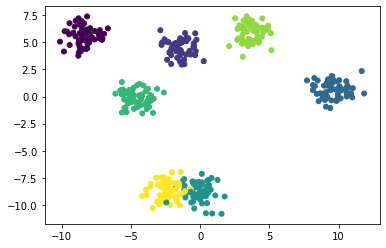

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 25);

In [5]:
# Create KMeans object and set initial number of clusters
k_means = KMeans(n_clusters=7)

# Fit the object to the X
k_means.fit(X)

# Generate cluster predictions with object
y_hat = k_means.predict(X)

2 important parameters: `init` and `algorithm`.

`init` = method for initialization:

- `k-means++` =default.  Selects initial cluster centers in a smart way in order to pursue fast convergence.
- `random`: choose k random observations for the initial centroids.
- `ndarray`: We can pass this argument and provide initial centers.

`algorithm` = algorithm used:

- Default = `auto`, automatically selects `full` for sparse data and `elkan` for dense data. 
- `full` = full EM-style (Expectation Maximization) algorithm is performed. In each iteration an E-step (in the context of K-means clustering, the points are assigned to the nearest center) and an M-step (the cluster mean is updated based on the elements of the cluster) is created. 
- EM algorithm can be slow. `elkan` variation is more efficient, but not available for sparse data.

# Evaluating Cluster Fitness

Can use a metric such as [**Calinski Harabasz Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) aka **Variance Ratio**.

Another metric = [**Silhouette Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) or Distortion.  different strengths and weaknesses between scores, depending on dataset and goals.  best to pick 1 and stick to it

## Computing Variance Ratios 
This is the ratio of the variance of the points within a cluster, to the variance of a point to points in other clusters.

i.e. we want intra-cluster variance to be low and inter-cluster variance to be high.

### Calinski-Harabaz Index
If actual cluster labels are unknown, we have to ust the model itself for evaluation

Higher Score = Better Clusters

Score = between-cluster dispersion : within-cluster dispersion

$$ s(k) = \dfrac{Tr(B_k)}{Tr(W_k)}\times \dfrac{N-k}{k-1}$$

where 

- $B_k$ between-cluster dispersion
- $W_k$ within-cluster dispersion
- $N$ is the data size

In [6]:
k_means = KMeans(n_clusters=7)
k_means.fit(X)
y_hat = k_means.predict(X)

In [7]:
calc_calinski_harabasz_score(k_means, X)

3607.806912779802

### The silhouette coefficient

If actual cluster labels are unknown, we have to ust the model itself for evaluation.  

2 scores used:

    1) Average distance between 1 data sample and other data in same cluster

    2) Average distance between 1 data sample and other data in other clusters
    
Silhouette Coefficient (Higher Score = better clusters):

$$ s = \dfrac{(b-a)}{max(b-a)} $$

In [8]:
k_means_6 = KMeans(n_clusters=6)
k_means_6.fit(X)

KMeans(n_clusters=6)

In [9]:
calc_silhouette_score(k_means_6, X)

0.7712111886802094

This number isn't very informative on its own, should be compared to another coefficient for a different K value.

## Visualize Clusters 

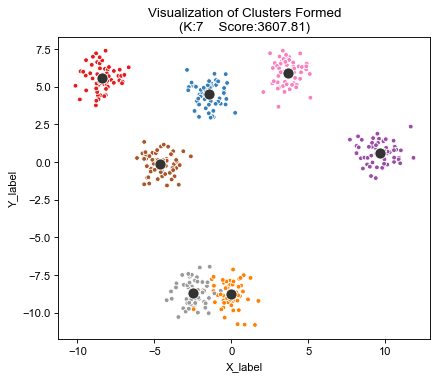

In [10]:
score = calc_calinski_harabasz_score(k_means, X)

plot_clusters(k_means, X, y, score)

## Function to calc score and plot best

In [11]:
# Test
k_means = k_means_fitted(4, X)

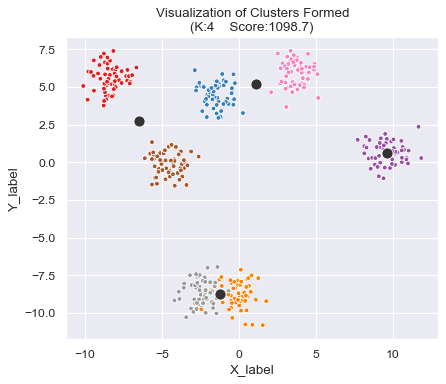

In [12]:
score = calc_calinski_harabasz_score(k_means, X)

plot_clusters(k_means, X, y, score)

## Optimal K value 
Create and fit a different K-means Clustering object for every value of K, then compare the Metric / Variant Ratio scores

### Elbow Plot
Can easily see where we hit a point of diminishing returns.

Depending on which metric, plot will be negative or positive slope

Higher values of K are not always best, as it introduces more complexity.  We therefore choose the "Elbow" in the graph.  After the Elbow, the metric we're optimizing gets better at a slower rate.  We want the simplest overall model that provides the most values with the least complexity.

In [13]:
k_range = list(range(2,10))
variances, best_variance, best_variance_k = calc_score_for_each_k(k_range, X, metric='variance')

Best Variance Score: 3607.81 (K=7)


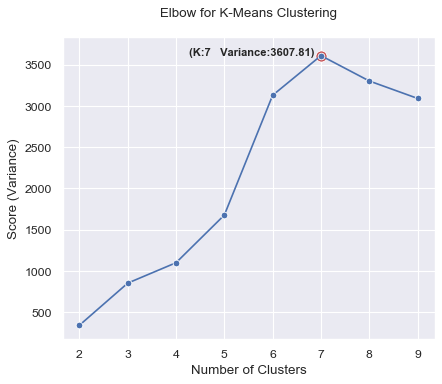

In [15]:
plot_k_scores(k_range, variances, best_variance, best_variance_k, metric='Variance', save_fig=False)

In [16]:
silhouettes, best_silhouette, best_silhouette_k = calc_score_for_each_k(k_range, X, metric='silhouette')

Best Silhouette Score: 0.77 (K=6)


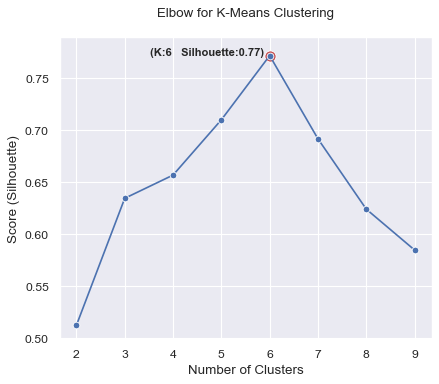

In [17]:
plot_k_scores(k_range, silhouettes, best_silhouette, best_silhouette_k, metric='Silhouette', save_fig=False)

## Plot Optimal K 

In [20]:
k_means = k_means_fitted(best_variance_k, X)

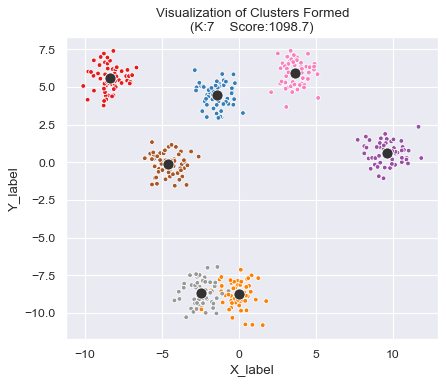

In [21]:
plot_clusters(k_means, X, y, score, x_label='X_label', y_label='Y_label', save_fig=False)